##**BITS F464 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------



# **_1. Preprocessing of Dataset_**

### The respective dataset has been shared in the project brief. Please refer to it.

In [ ]:
import numpy as np
import pandas as pd

file_path = 'Heart_Disease.csv'

# Read the CSV file without column labels
df = pd.read_csv(file_path, header=None)

column_names = ['hospital', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Assign the column names to the DataFrame
df.columns = column_names

# Display the DataFrame with the new column names
print(df.head(10).to_markdown(index=False))

# Save the DataFrame to a new CSV file
output_file_path = 'Heart_Disease_labeled.csv'
df.to_csv(output_file_path, index=False)

| hospital   |   age |   sex |   cp |   trestbps |   chol |   fbs |   restecg |   thalach |   exang |   oldpeak |   slope |   ca |   thal |   num |
|:-----------|------:|------:|-----:|-----------:|-------:|------:|----------:|----------:|--------:|----------:|--------:|-----:|-------:|------:|
| Cleveland  |    63 |     1 |    1 |        145 |    233 |     1 |         2 |       150 |       0 |       2.3 |       3 |    0 |      6 |     0 |
| Cleveland  |    67 |     1 |    4 |        160 |    286 |     0 |         2 |       108 |       1 |       1.5 |       2 |    3 |      3 |     2 |
| Cleveland  |    67 |     1 |    4 |        120 |    229 |     0 |         2 |       129 |       1 |       2.6 |       2 |    2 |      7 |     1 |
| Cleveland  |    37 |     1 |    3 |        130 |    250 |     0 |         0 |       187 |       0 |       3.5 |       3 |    0 |      3 |     0 |
| Cleveland  |    41 |     0 |    2 |        130 |    204 |     0 |         2 |       172 |       0 |       1.4 

In [ ]:
# a. Load the dataset and examine its structure
file_path = 'Heart_Disease_labeled.csv'
df = pd.read_csv(file_path, na_values='?')  # Specify '?' as missing values
# Checking for missing values, outliers, and inconsistencies in the data
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
hospital      0
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [ ]:
# Handle missing values for numerical columns
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numerical_features:
    df[feature].fillna(df[feature].median(), inplace=True)

# Handle missing values for categorical columns
categorical_features = ['hospital', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

print(df.head(10).to_markdown(index=False))

| hospital   |   age |   sex |   cp |   trestbps |   chol |   fbs |   restecg |   thalach |   exang |   oldpeak |   slope |   ca |   thal |   num |
|:-----------|------:|------:|-----:|-----------:|-------:|------:|----------:|----------:|--------:|----------:|--------:|-----:|-------:|------:|
| Cleveland  |    63 |     1 |    1 |        145 |    233 |     1 |         2 |       150 |       0 |       2.3 |       3 |    0 |      6 |     0 |
| Cleveland  |    67 |     1 |    4 |        160 |    286 |     0 |         2 |       108 |       1 |       1.5 |       2 |    3 |      3 |     2 |
| Cleveland  |    67 |     1 |    4 |        120 |    229 |     0 |         2 |       129 |       1 |       2.6 |       2 |    2 |      7 |     1 |
| Cleveland  |    37 |     1 |    3 |        130 |    250 |     0 |         0 |       187 |       0 |       3.5 |       3 |    0 |      3 |     0 |
| Cleveland  |    41 |     0 |    2 |        130 |    204 |     0 |         2 |       172 |       0 |       1.4 

In [ ]:
# Handle values out of bounds for the 'num' column
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
print(df.head(10).to_markdown(index=False))

| hospital   |   age |   sex |   cp |   trestbps |   chol |   fbs |   restecg |   thalach |   exang |   oldpeak |   slope |   ca |   thal |   num |
|:-----------|------:|------:|-----:|-----------:|-------:|------:|----------:|----------:|--------:|----------:|--------:|-----:|-------:|------:|
| Cleveland  |    63 |     1 |    1 |        145 |    233 |     1 |         2 |       150 |       0 |       2.3 |       3 |    0 |      6 |     0 |
| Cleveland  |    67 |     1 |    4 |        160 |    286 |     0 |         2 |       108 |       1 |       1.5 |       2 |    3 |      3 |     1 |
| Cleveland  |    67 |     1 |    4 |        120 |    229 |     0 |         2 |       129 |       1 |       2.6 |       2 |    2 |      7 |     1 |
| Cleveland  |    37 |     1 |    3 |        130 |    250 |     0 |         0 |       187 |       0 |       3.5 |       3 |    0 |      3 |     0 |
| Cleveland  |    41 |     0 |    2 |        130 |    204 |     0 |         2 |       172 |       0 |       1.4 

In [ ]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['hospital', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)
print(df.head(5).to_markdown(index=False))

|   age |   trestbps |   chol |   thalach |   oldpeak |   num |   hospital_Hungarian |   hospital_Switzerland |   hospital_VA |   sex_1 |   cp_2 |   cp_3 |   cp_4 |   fbs_1.0 |   restecg_1.0 |   restecg_2.0 |   exang_1.0 |   slope_2.0 |   slope_3.0 |   ca_1.0 |   ca_2.0 |   ca_3.0 |   thal_6.0 |   thal_7.0 |
|------:|-----------:|-------:|----------:|----------:|------:|---------------------:|-----------------------:|--------------:|--------:|-------:|-------:|-------:|----------:|--------------:|--------------:|------------:|------------:|------------:|---------:|---------:|---------:|-----------:|-----------:|
|    63 |        145 |    233 |       150 |       2.3 |     0 |                    0 |                      0 |             0 |       1 |      0 |      0 |      0 |         1 |             0 |             1 |           0 |           0 |           1 |        0 |        0 |        0 |          1 |          0 |
|    67 |        160 |    286 |       108 |       1.5 |     1 |       

In [ ]:
# Shuffle the DataFrame rows
df = df.sample(frac=1).reset_index(drop=True)

# split ratio ( 67% training, 33% testing)
split_ratio = 0.67
split_index = int(len(df) * split_ratio)

# Split the data into training and testing sets using Pandas
train_data = df.iloc[:split_index, :]
test_data = df.iloc[split_index:, :]

# Use Pandas to get X_train, y_train, X_test, and y_test
X_train = train_data.drop('num', axis=1)
y_train = train_data['num']

X_test = test_data.drop('num', axis=1)
y_test = test_data['num']

In [ ]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,hospital_Hungarian,hospital_Switzerland,hospital_VA,sex_1,cp_2,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,41,110.0,235.0,153.0,0.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,45,130.0,219.0,130.0,1.0,1,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
2,46,140.0,275.0,165.0,0.0,1,0,0,1,1,...,0,0,1,1,0,0,0,0,0,0
3,58,150.0,219.0,118.0,0.0,0,0,1,1,0,...,1,0,1,1,0,0,0,0,0,0
4,55,140.0,217.0,111.0,5.6,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1


# ***2. ML Model 1- PERCEPTRON***

In [ ]:
# Perceptron Class
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X.values):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X.values, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


# Performance Metrics Functions
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tp, fp], [fn, tn]])

def precision(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    tp = conf_mat[0, 0]
    fp = conf_mat[0, 1]
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    tp = conf_mat[0, 0]
    fn = conf_mat[1, 0]
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

#testing
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)

# Perceptron Prediction
predictions = p.predict(X_test)

# Performance Metrics
conf_matrix_perceptron = confusion_matrix(y_test, predictions)
prec_perceptron = precision(y_test, predictions)
rec_perceptron = recall(y_test, predictions)
f1_perceptron = f1_score(y_test, predictions)
acc_perceptron = accuracy(y_test, predictions)

# Print metrics
print("Accuracy:", acc_perceptron)
print("Precision:", prec_perceptron)
print("Recall:", rec_perceptron)
print("F1 Score:", f1_perceptron)
print("\nConfusion Matrix:\n", conf_matrix_perceptron)


Accuracy: 0.7796052631578947
Precision: 0.8343558282208589
Recall: 0.7727272727272727
F1 Score: 0.8023598820058997

Confusion Matrix:
 [[136  27]
 [ 40 101]]


# Actual vs Predicted plot for perceptron(Model-1)

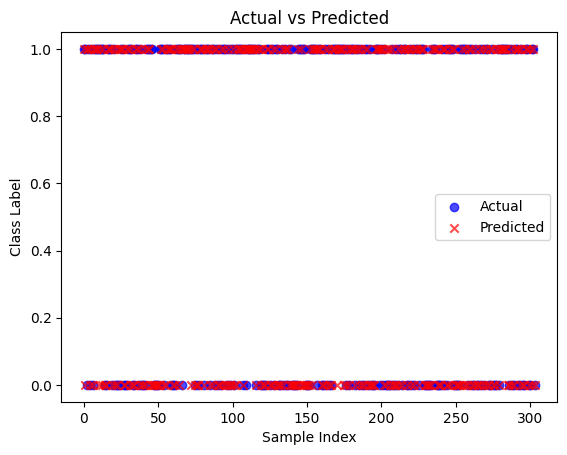

In [ ]:
import matplotlib.pyplot as plt

# Plot for actual vs predicted data
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', marker='o', alpha=0.7)
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted', marker='x', alpha=0.7)

plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()
plt.show()

# Receiver Operating Characteristic (ROC) curve for perceptron(Model-1)

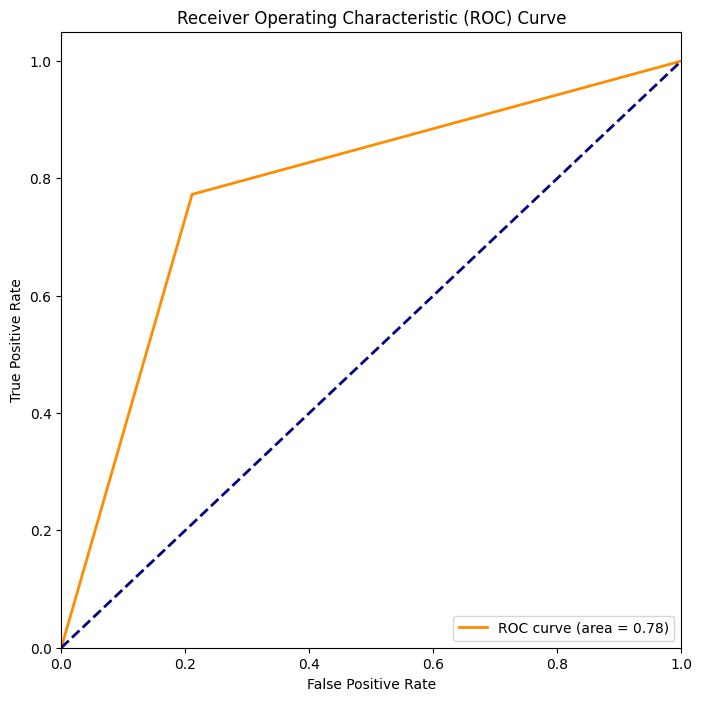

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# ***3. ML Model 2- KNN***



In [ ]:
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test.values]
        return np.array(predictions)

    def _predict(self, x):
        # Calculate distances between x and all examples in the training set
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train.values]

        # Getting indices of k-nearest training data points
        k_neighbors_indices = np.argsort(distances)[:self.k]

        # Getting the labels of the k-nearest training data points
        k_neighbor_labels = [self.y_train.iloc[i] for i in k_neighbors_indices]

        # Return the most common class label among the k-nearest neighbors
        return max(set(k_neighbor_labels), key=k_neighbor_labels.count)

# Performance Metrics Functions
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tp, fp], [fn, tn]])

def precision(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    tp = conf_mat[0, 0]
    fp = conf_mat[0, 1]
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    tp = conf_mat[0, 0]
    fn = conf_mat[1, 0]
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Create and train the KNN model
knn_model = KNN(k=3)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, knn_predictions)
prec_knn = precision(y_test, knn_predictions)
rec_knn = recall(y_test, knn_predictions)
f1_knn = f1_score(y_test, knn_predictions)
acc_knn = accuracy(y_test, knn_predictions)

# Print metrics
print("KNN Accuracy:", acc_knn)
print("KNN Precision:", prec_knn)
print("KNN Recall:", rec_knn)
print("KNN F1 Score:", f1_knn)
print("\nKNN Confusion Matrix:\n", conf_matrix_knn)


KNN Accuracy: 0.6348684210526315
KNN Precision: 0.6900584795321637
KNN Recall: 0.6704545454545454
KNN F1 Score: 0.6801152737752161

KNN Confusion Matrix:
 [[118  53]
 [ 58  75]]


# Actual vs Predicted plot for KNN (Model-2)

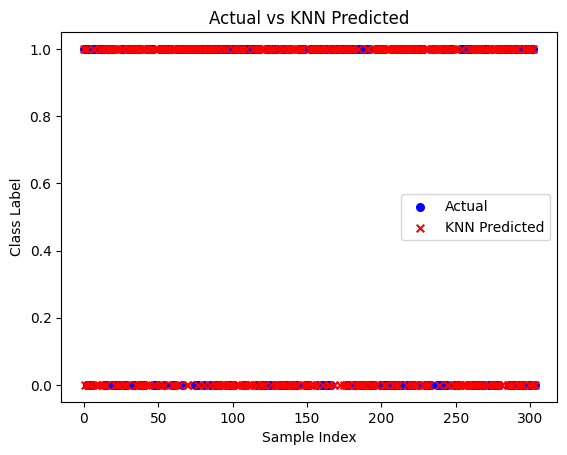

In [ ]:
import matplotlib.pyplot as plt

# Plot for actual vs predicted for KNN
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', marker='o', alpha=1.0, s=30)
plt.scatter(range(len(knn_predictions)), knn_predictions, color='red', label='KNN Predicted', marker='x', alpha=1.0, s=30)

plt.title('Actual vs KNN Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()
plt.show()


# Receiver Operating Characteristic (ROC) curve for KNN(Model-2)

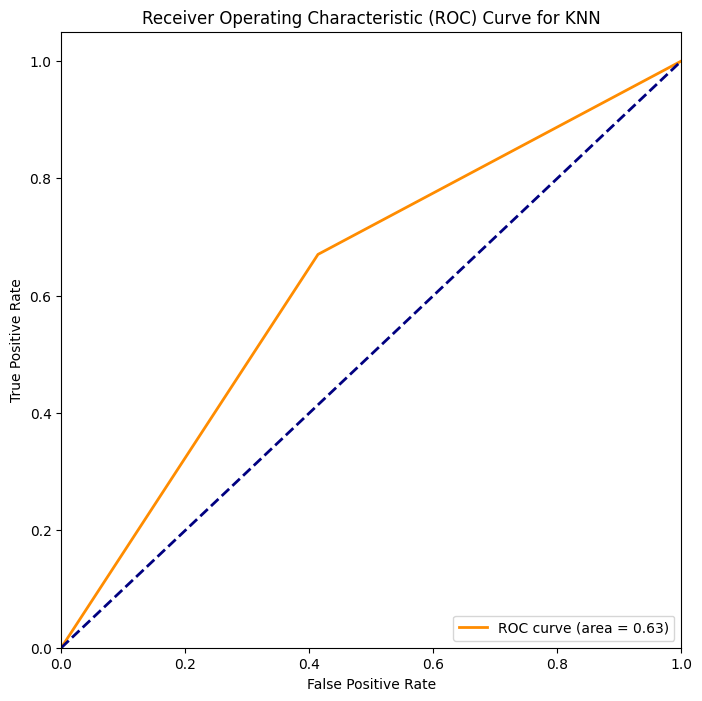

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_predictions)

# Compute Area Under the Curve (AUC) for KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for KNN
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()


# ***4. ML Model 3- ADABOOST***

In [ ]:
import numpy as np

class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1

        return predictions

class CustomAdaBoost:
    def __init__(self, num_classifiers=5):
        self.num_classifiers = num_classifiers
        self.classifiers = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        weights = np.full(n_samples, (1 / n_samples))
        self.classifiers = []

        for _ in range(self.num_classifiers):
            clf = DecisionStump()
            min_error = float("inf")

            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1

                    misclassified = weights[y != predictions]
                    error = sum(misclassified)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            predictions = clf.predict(X)
            weights *= np.exp(-clf.alpha * y * predictions)
            weights /= np.sum(weights)

            self.classifiers.append(clf)

    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.classifiers]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)
        return y_pred

# performance metric functions
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == -1) & (y_pred == -1))
    fp = np.sum((y_true == -1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == -1))
    return np.array([[tp, fp], [fn, tn]])

def precision(y_true, y_pred):
    conf_mat =confusion_matrix(y_true, y_pred)
    tp = conf_mat[0, 0]
    fp = conf_mat[0, 1]
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    tp = conf_mat[0, 0]
    fn = conf_mat[1, 0]
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0


# Converting 0 labels to -1
df.loc[df['num'] == 0, 'num'] = -1

# Extract X and y
X_train = df.drop('num', axis=1)
y_train = df['num']

# Custom AdaBoost classification with 5 weak classifiers
custom_clf = CustomAdaBoost(num_classifiers=5)
custom_clf.fit(X_train.to_numpy(), y_train.to_numpy())

# Make predictions on the test set
custom_y_pred = custom_clf.predict(X_test.to_numpy())

# Evaluate the model using modified performance metrics
conf_matrix_adaboost = confusion_matrix(y_test, custom_y_pred)
prec_adaboost = precision(y_test, custom_y_pred)
rec_adaboost= recall(y_test, custom_y_pred)
f1_adaboost= f1_score(y_test, custom_y_pred)
acc_adaboost= accuracy(y_test, custom_y_pred)

# Print modified metrics
print("Custom Accuracy:", acc_adaboost)
print("Custom Precision:", prec_adaboost)
print("Custom Recall:", rec_adaboost)
print("Custom F1 Score:", f1_adaboost)
print("Custom Confusion Matrix:")
print(conf_matrix_adaboost)

Custom Accuracy: 0.7664473684210527
Custom Precision: 0.8220858895705522
Custom Recall: 0.7613636363636364
Custom F1 Score: 0.7905604719764012
Custom Confusion Matrix:
[[134  29]
 [ 42  99]]


# Actual vs Predicted plot for Adaboost (Model-3)

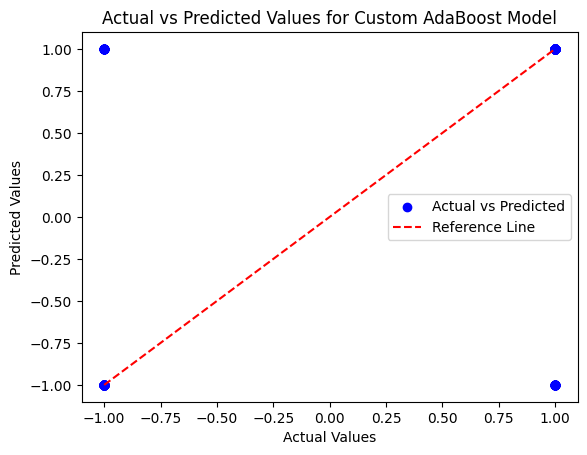

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Actual vs Predicted
plt.scatter(y_test, custom_y_pred, color='blue', label='Actual vs Predicted')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Custom AdaBoost Model')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Reference Line')

# Add legend
plt.legend()

# Display the plot
plt.show()


# Receiver Operating Characteristic (ROC) curve for Adaboost(Model-3)

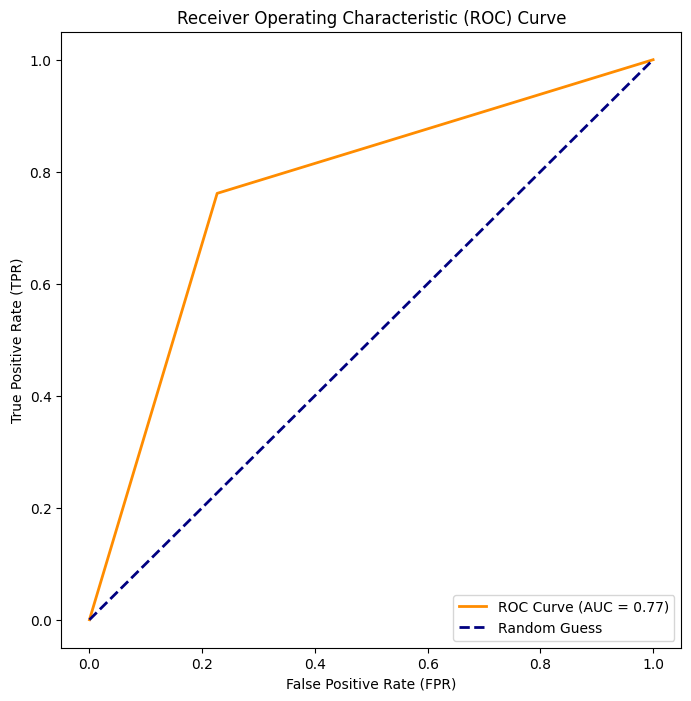

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, custom_y_pred)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

# Add labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()


# ***5. ML Model 4- CATBOOST (Based on research literature)***

In [ ]:
import numpy as np

class CatBoostClassifier:
    def __init__(self, learning_rate=0.1, n_estimators=100, depth=3):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.depth = depth
        self.trees = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        residuals = y.astype(float)

        for _ in range(self.n_estimators):
            tree = self.build_tree(X, residuals, depth=self.depth)
            predictions = self.predict_tree(X, tree)
            residuals -= self.learning_rate * predictions
            self.trees.append(tree)

    def build_tree(self, X, residuals, depth):
        if depth == 0:
            return np.mean(residuals)

        best_feature, best_threshold = self.find_best_split(X, residuals)
        if best_feature is None:
            return np.mean(residuals)

        left_mask = X[:, best_feature] < best_threshold
        right_mask = ~left_mask

        left_tree = self.build_tree(X[left_mask], residuals[left_mask], depth - 1)
        right_tree = self.build_tree(X[right_mask], residuals[right_mask], depth - 1)

        return {'feature': best_feature, 'threshold': best_threshold, 'left': left_tree, 'right': right_tree}

    def find_best_split(self, X, residuals):
        n_samples, n_features = X.shape
        best_feature = None
        best_threshold = None
        best_loss = float('inf')

        for feature in range(n_features):
            unique_values = np.unique(X[:, feature])
            for threshold in unique_values:
                left_mask = X[:, feature] < threshold
                right_mask = ~left_mask

                left_residuals = residuals[left_mask]
                right_residuals = residuals[right_mask]

                loss = self.calculate_loss(left_residuals) + self.calculate_loss(right_residuals)
                if loss < best_loss:
                    best_loss = loss
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def calculate_loss(self, residuals):
        # Mean Squared Error as the loss function
        return np.mean(residuals**2)

    def predict_tree(self, X, tree):
        if isinstance(tree, (float, np.float64)):
            return tree

        feature = tree['feature']
        threshold = tree['threshold']
        left_mask = X[:, feature] < threshold
        right_mask = ~left_mask

        predictions = np.zeros(len(X))
        predictions[left_mask] = self.predict_tree(X[left_mask], tree['left'])
        predictions[right_mask] = self.predict_tree(X[right_mask], tree['right'])

        return predictions

    def predict(self, X):
        predictions = np.zeros(len(X))
        for tree in self.trees:
            predictions += self.learning_rate * self.predict_tree(X, tree)
        return np.sign(predictions)


# Assuming you have loaded and split your preprocessed data
# X_train, y_train, X_test, y_test

# Convert 0 labels to -1
df.loc[df['num'] == 0, 'num'] = -1

# Extract X and y
X_train = df.drop('num', axis=1).to_numpy()
y_train = df['num'].to_numpy()

# Custom CatBoost classification with 100 trees, learning rate 0.1, and depth 3
catboost_clf = CatBoostClassifier(learning_rate=0.1, n_estimators=100, depth=3)
catboost_clf.fit(X_train, y_train)

# Make predictions on the test set
catboost_y_pred = catboost_clf.predict(X_test.to_numpy())

# Evaluate the model using modified performance metrics
conf_matrix_catboost = confusion_matrix(y_test, catboost_y_pred)
prec_catboost = precision(y_test, catboost_y_pred)
rec_catboost = recall(y_test, catboost_y_pred)
f1_catboost = f1_score(y_test, catboost_y_pred)
acc_catboost = accuracy(y_test, catboost_y_pred)

# Print modified metrics
print("CatBoost Accuracy:", acc_catboost)
print("CatBoost Precision:", prec_catboost)
print("CatBoost Recall:", rec_catboost)
print("CatBoost F1 Score:", f1_catboost)
print("CatBoost Confusion Matrix:")
print(conf_matrix_catboost)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


CatBoost Accuracy: 0.5822368421052632
CatBoost Precision: 0.5808580858085809
CatBoost Recall: 1.0
CatBoost F1 Score: 0.7348643006263049
CatBoost Confusion Matrix:
[[176 127]
 [  0   1]]


# Actual vs Predicted plot for Catboost (Model-4)

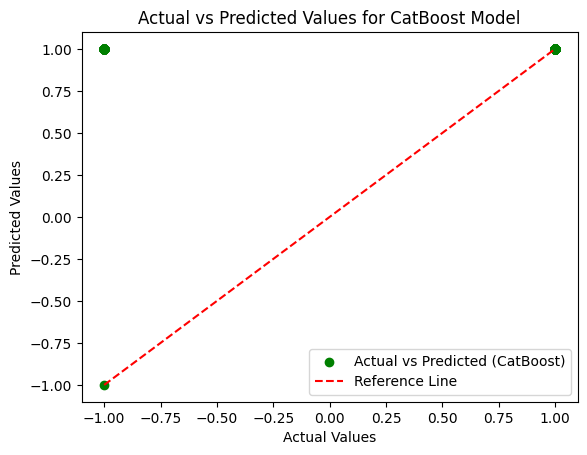

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Actual vs Predicted
plt.scatter(y_test, catboost_y_pred, color='green', label='Actual vs Predicted (CatBoost)')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for CatBoost Model')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Reference Line')

# Add legend
plt.legend()

# Display the plot
plt.show()


# Receiver Operating Characteristic (ROC) curve for Catboost(Model-4)

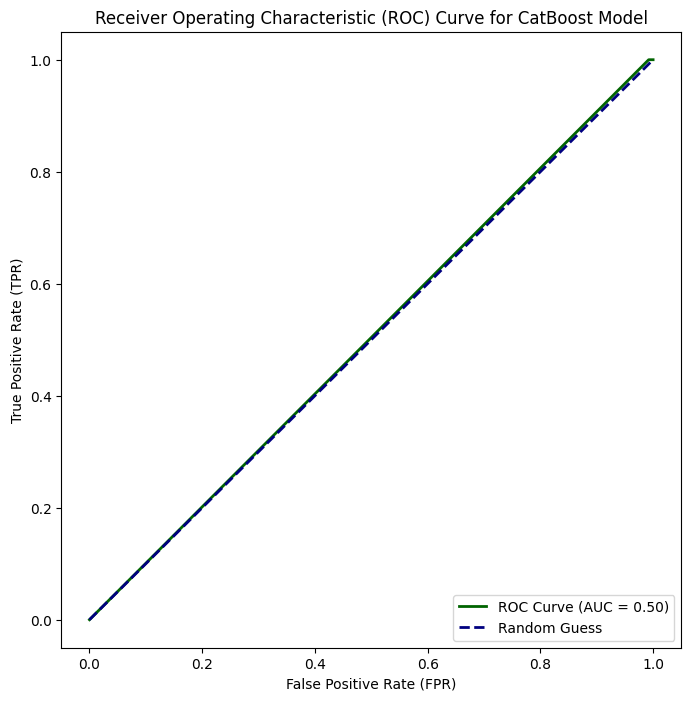

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for CatBoost model
fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, catboost_y_pred)

# Calculate AUC (Area Under the Curve) for CatBoost model
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

# Plot ROC curve for CatBoost model
plt.figure(figsize=(8, 8))
plt.plot(fpr_catboost, tpr_catboost, color='darkgreen', lw=2, label=f'ROC Curve (AUC = {roc_auc_catboost:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

# Add labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for CatBoost Model')
plt.legend(loc='lower right')

# Display the plot
plt.show()


# ***6. Comparison of insights drawn from the models***

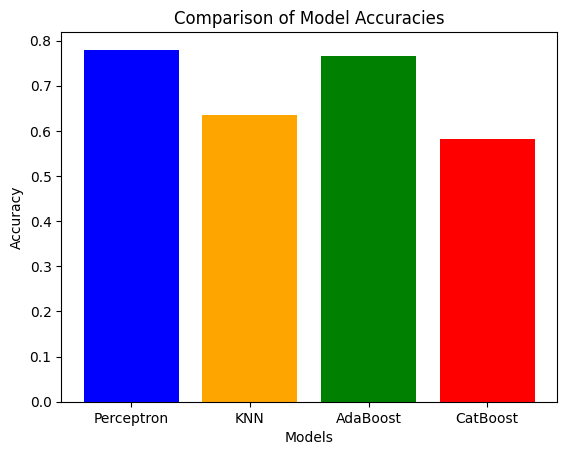

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy values for each model
accuracies = [acc_perceptron, acc_knn, acc_adaboost, acc_catboost]

models = [ 'Perceptron','KNN' ,'AdaBoost', 'CatBoost']

# Bar plot
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Display the plot
plt.show()


**Insights**


---
**Perceptron**:

• Achieves the highest accuracy among the models.

• High precision indicates a good ability to correctly identify positive cases.

• Balanced recall suggests a decent ability to capture positive cases.


---
**KNN**:

• Moderate accuracy compared to other models.

• Precision and recall are relatively balanced.


---
**AdaBoost**:

• Demonstrates a solid balance between precision and recall.

• Competitive accuracy compared to other models.


---
**CatBoost**:

• Lowest accuracy among the models.

• High recall indicates the ability to capture all positive cases.

• Low precision suggests a higher rate of false positives.


---
**Conclusion**:

*Perceptron appears to be the best-performing model, achieving the highest accuracy and a good balance between precision and recall.Hence perceptron model is the one that accurately classifies patients into those with heart
disease and those without it among other models which are implemented above.*
